In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# EDA

<Axes: >

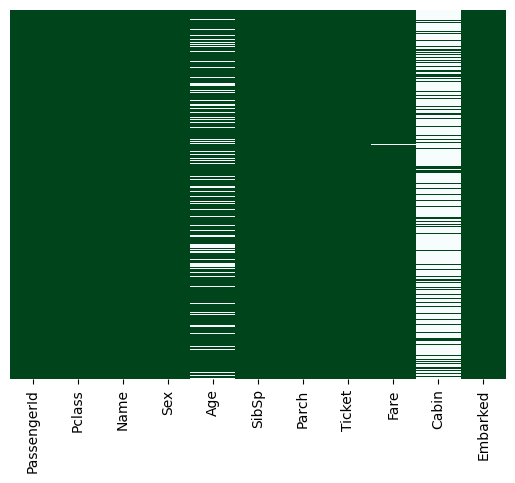

In [6]:
sns.heatmap(test.isnull(),yticklabels=False,cmap='BuGn_r',cbar=False)
# isnull() method stores True for ever NaN(Not a Number) value and False for a Not null value, and just the columns that have a false value will show up in the plot.
# notnull() method do the opposite work of isnull() method.

C:\Users\krishna\AppData\Local\Temp\ipykernel_13172\3139002180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')


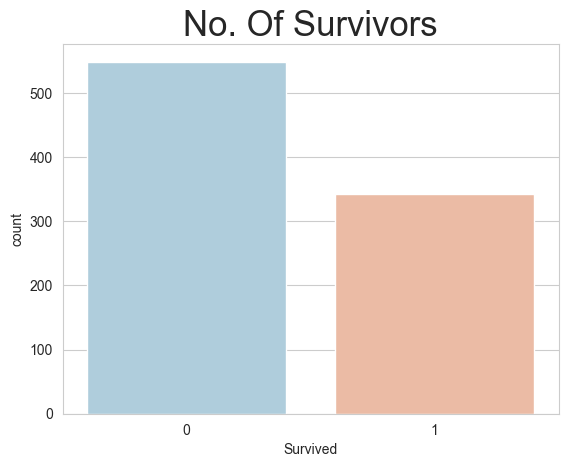

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')
plt.title("No. Of Survivors",size=25)
plt.show()

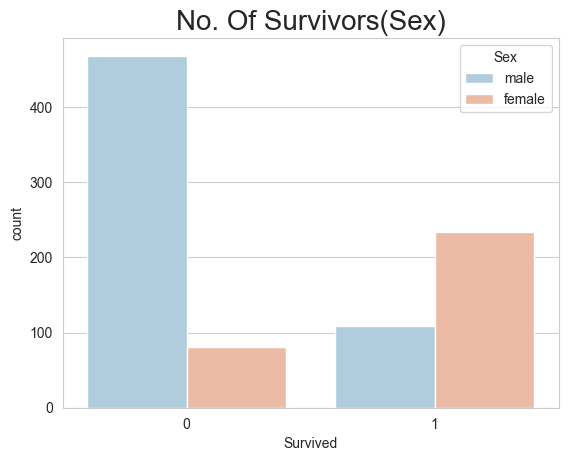

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
plt.title("No. Of Survivors(Sex)",size=20)
plt.show()

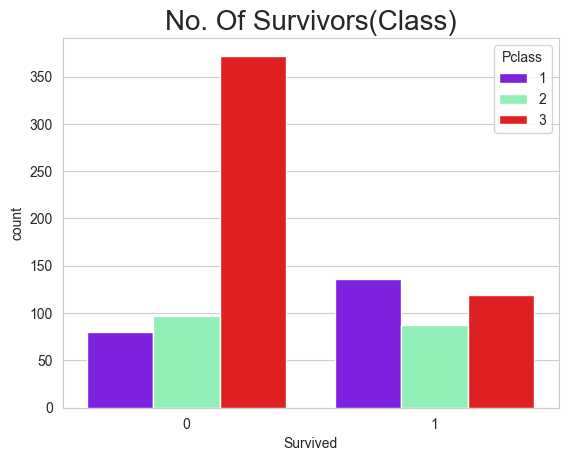

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.title("No. Of Survivors(Class)",size=20)
plt.show()

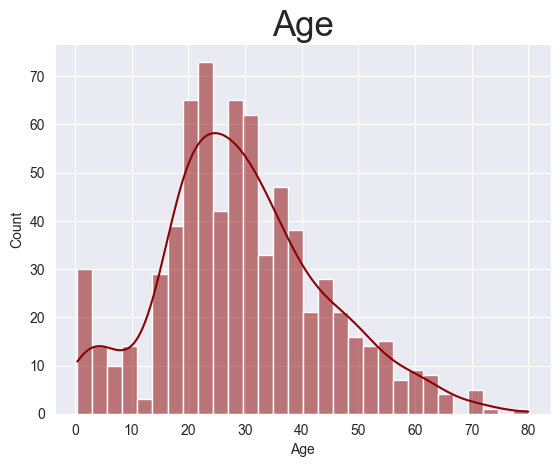

In [10]:
sns.set_style('darkgrid')
sns.histplot(train['Age'].dropna(),color='darkred',bins=30,kde=True)
plt.title('Age',size=25)
plt.show()

C:\Users\krishna\AppData\Local\Temp\ipykernel_13172\3112185812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


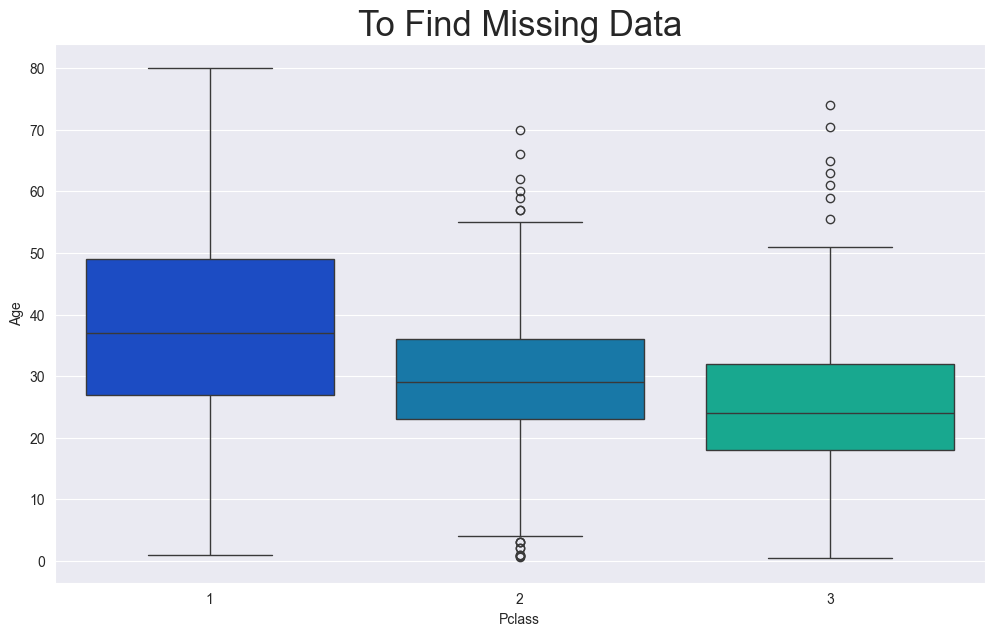

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
plt.title("To Find Missing Data",size=25)
plt.show()

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [13]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\krishna\AppData\Local\Temp\ipykernel_13172\822839471.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\krishna\AppData\Local\Temp\ipykernel_13172\822839471.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


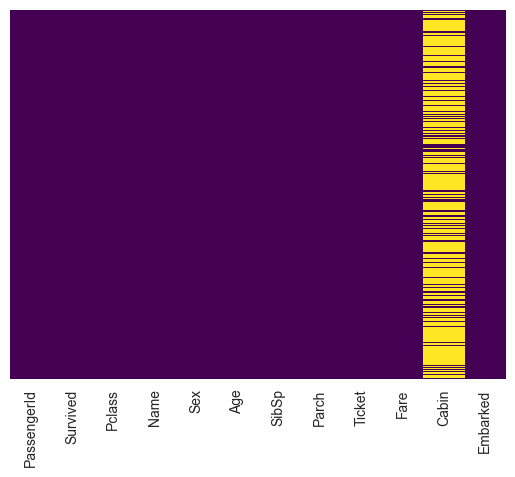

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [15]:
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


# Logistic Regression Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\krishna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predictions = logmodel.predict(X_test)

# Evaluation

In [23]:
from sklearn.metrics import classification_report

In [24]:

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       163
           1       0.84      0.64      0.73       104

    accuracy                           0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.82      0.81      0.81       267



In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[150  13]
 [ 37  67]]


In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('MAE :',mean_absolute_error(y_test,predictions))
print('MSE :',mean_squared_error(y_test,predictions))

MAE : 0.18726591760299627
MSE : 0.18726591760299627


In [27]:
import pickle

# Save the Logistic Regression model
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(logmodel, file)

print("logModel saved as 'titanic_model.pkl'")


logModel saved as 'titanic_model.pkl'


In [28]:
# Load the Logistic Regression model
with open('titanic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Example: Making predictions with the loaded model
predictions = loaded_model.predict(X_test)
print("Predictions:", predictions)


Predictions: [0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1]


1. Difference Between Precision and Recall:
Precision: Measures the proportion of true positive predictions among all positive predictions.

Formula: 
Precision=True Positives (TP)/True Positives (TP)+False Positives (FP) 

Focus: How many selected items are relevant?

Recall: Measures the proportion of true positive predictions among all actual positive cases.

Formula: 
Recall
=True Positives (TP)/True Positives (TP)+False Negatives (FN)

Focus: How many relevant items are selected?

Key Difference: Precision emphasizes correctness of predictions (minimizing false positives), while recall emphasizes completeness (minimizing false negatives).

2. What is Cross-Validation, and Why is it Important in Binary Classification?
Cross-Validation: A resampling technique used to evaluate a model's performance by splitting the dataset into multiple folds (subsets). One fold is used as a validation set, and the rest are used for training. This process is repeated, and the results are averaged.

Why Important:

Ensures the model is tested on unseen data to prevent overfitting.

Provides a more reliable estimate of model performance compared to a single train-test split.

Helps optimize hyperparameters and select the best model by giving a balanced view of performance across folds.